In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os
import cmath
from numpy.polynomial import Polynomial
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import seaborn as sns

# Data Acquisition

In [2]:
dataexp_1 = pd.read_excel(r'c:/Users/nelso/Documents/[Università]/[Laurea Magistrale]/[Primo Anno]/Scientific data acquisition and processing/Data Analysis/Lab_Sc_data_acquisition/Lab_Sc_data_acquisition/01_alluminio_frattale/raw_data/01_alluminio_frattale_raw.xlsx', 'Part I')
dataexp_2 = pd.read_excel(r'c:/Users/nelso/Documents/[Università]/[Laurea Magistrale]/[Primo Anno]/Scientific data acquisition and processing/Data Analysis/Lab_Sc_data_acquisition/Lab_Sc_data_acquisition/01_alluminio_frattale/raw_data/01_alluminio_frattale_raw.xlsx', 'Part II')

lengths =  np.array(dataexp_1['Mean Length'])
mass = np.array(dataexp_1['Mean Mass'])
diameters = np.array(dataexp_2['Mean Diameter'])

Plots Setup

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 10,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

In [4]:
# Power-law function y = k * x^alpha
def power_law(x, k, alpha):
    return k * np.power(x, alpha)

# Part I: Aluminum foil squares 

In [14]:
#params1, covariance = curve_fit(power_law, lengths, mass)
params1, covariance = curve_fit(power_law, lengths[:-1], mass[:-1])
# Extract the best-fit parameters
k, alpha = params1
print(f"Best-fit k: {k}")
print(f"Best-fit alpha: {alpha}")

#Error on the parameters
errors1 = np.sqrt(np.diag(covariance))
print(f"Error on k: {errors1[0]}")
print(f"Error on alpha: {errors1[1]}")

Best-fit k: 0.0034303910570835836
Best-fit alpha: 1.991877141192994
Error on k: 0.0001205422619189701
Error on alpha: 0.01091232144368309


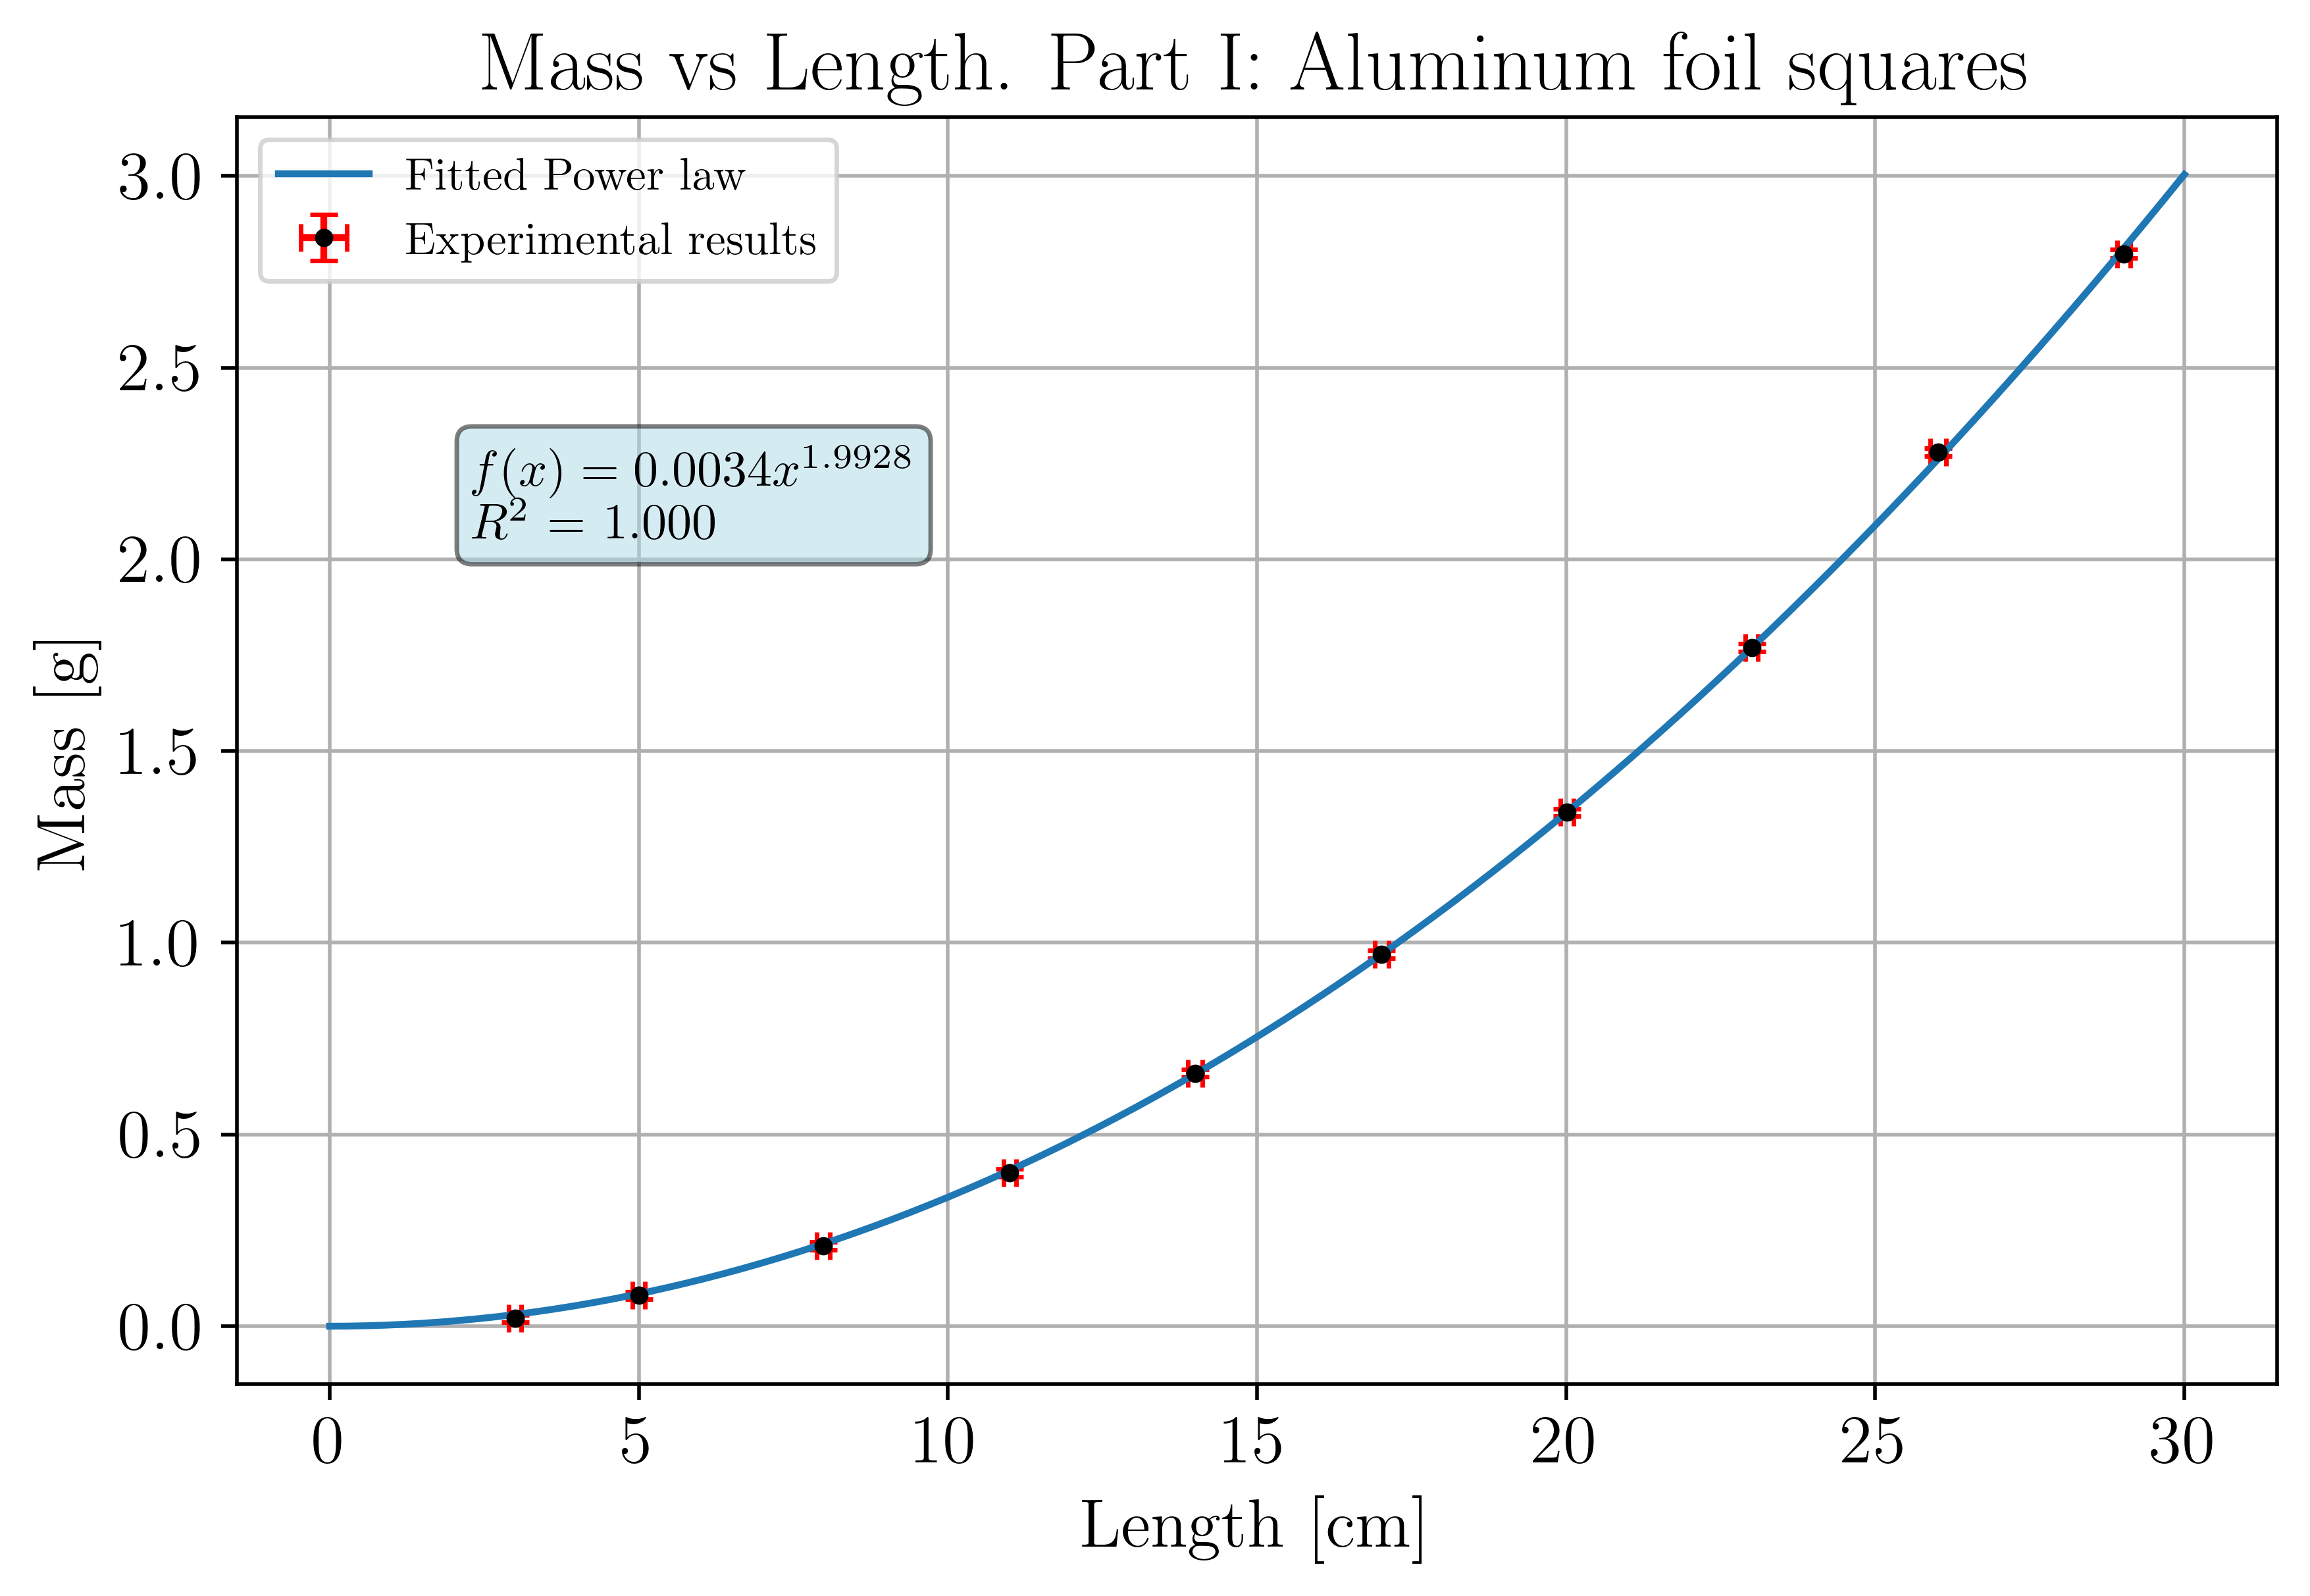

In [6]:
#Power Law fit
x_fit = np.linspace(0, 30, 100)

r_squared = r2_score(mass, power_law(lengths, *params1))
equation_str = f"$f(x) = {k:.4f}x^{{{alpha:.4f}}}$"

fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(lengths,mass, xerr = dataexp_1['Error Length'], yerr = dataexp_1['Error Mass'],color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, power_law(x_fit, *params1), label='Fitted Power law')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"{equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(2.3, 2.3, textstr, fontsize=11, verticalalignment='top', bbox=props)

plt.xlabel('Length [cm]')
plt.ylabel('Mass [g]')
plt.title('Mass vs Length. Part I: Aluminum foil squares')
plt.grid()
plt.legend()
plt.show()

# Linearization I

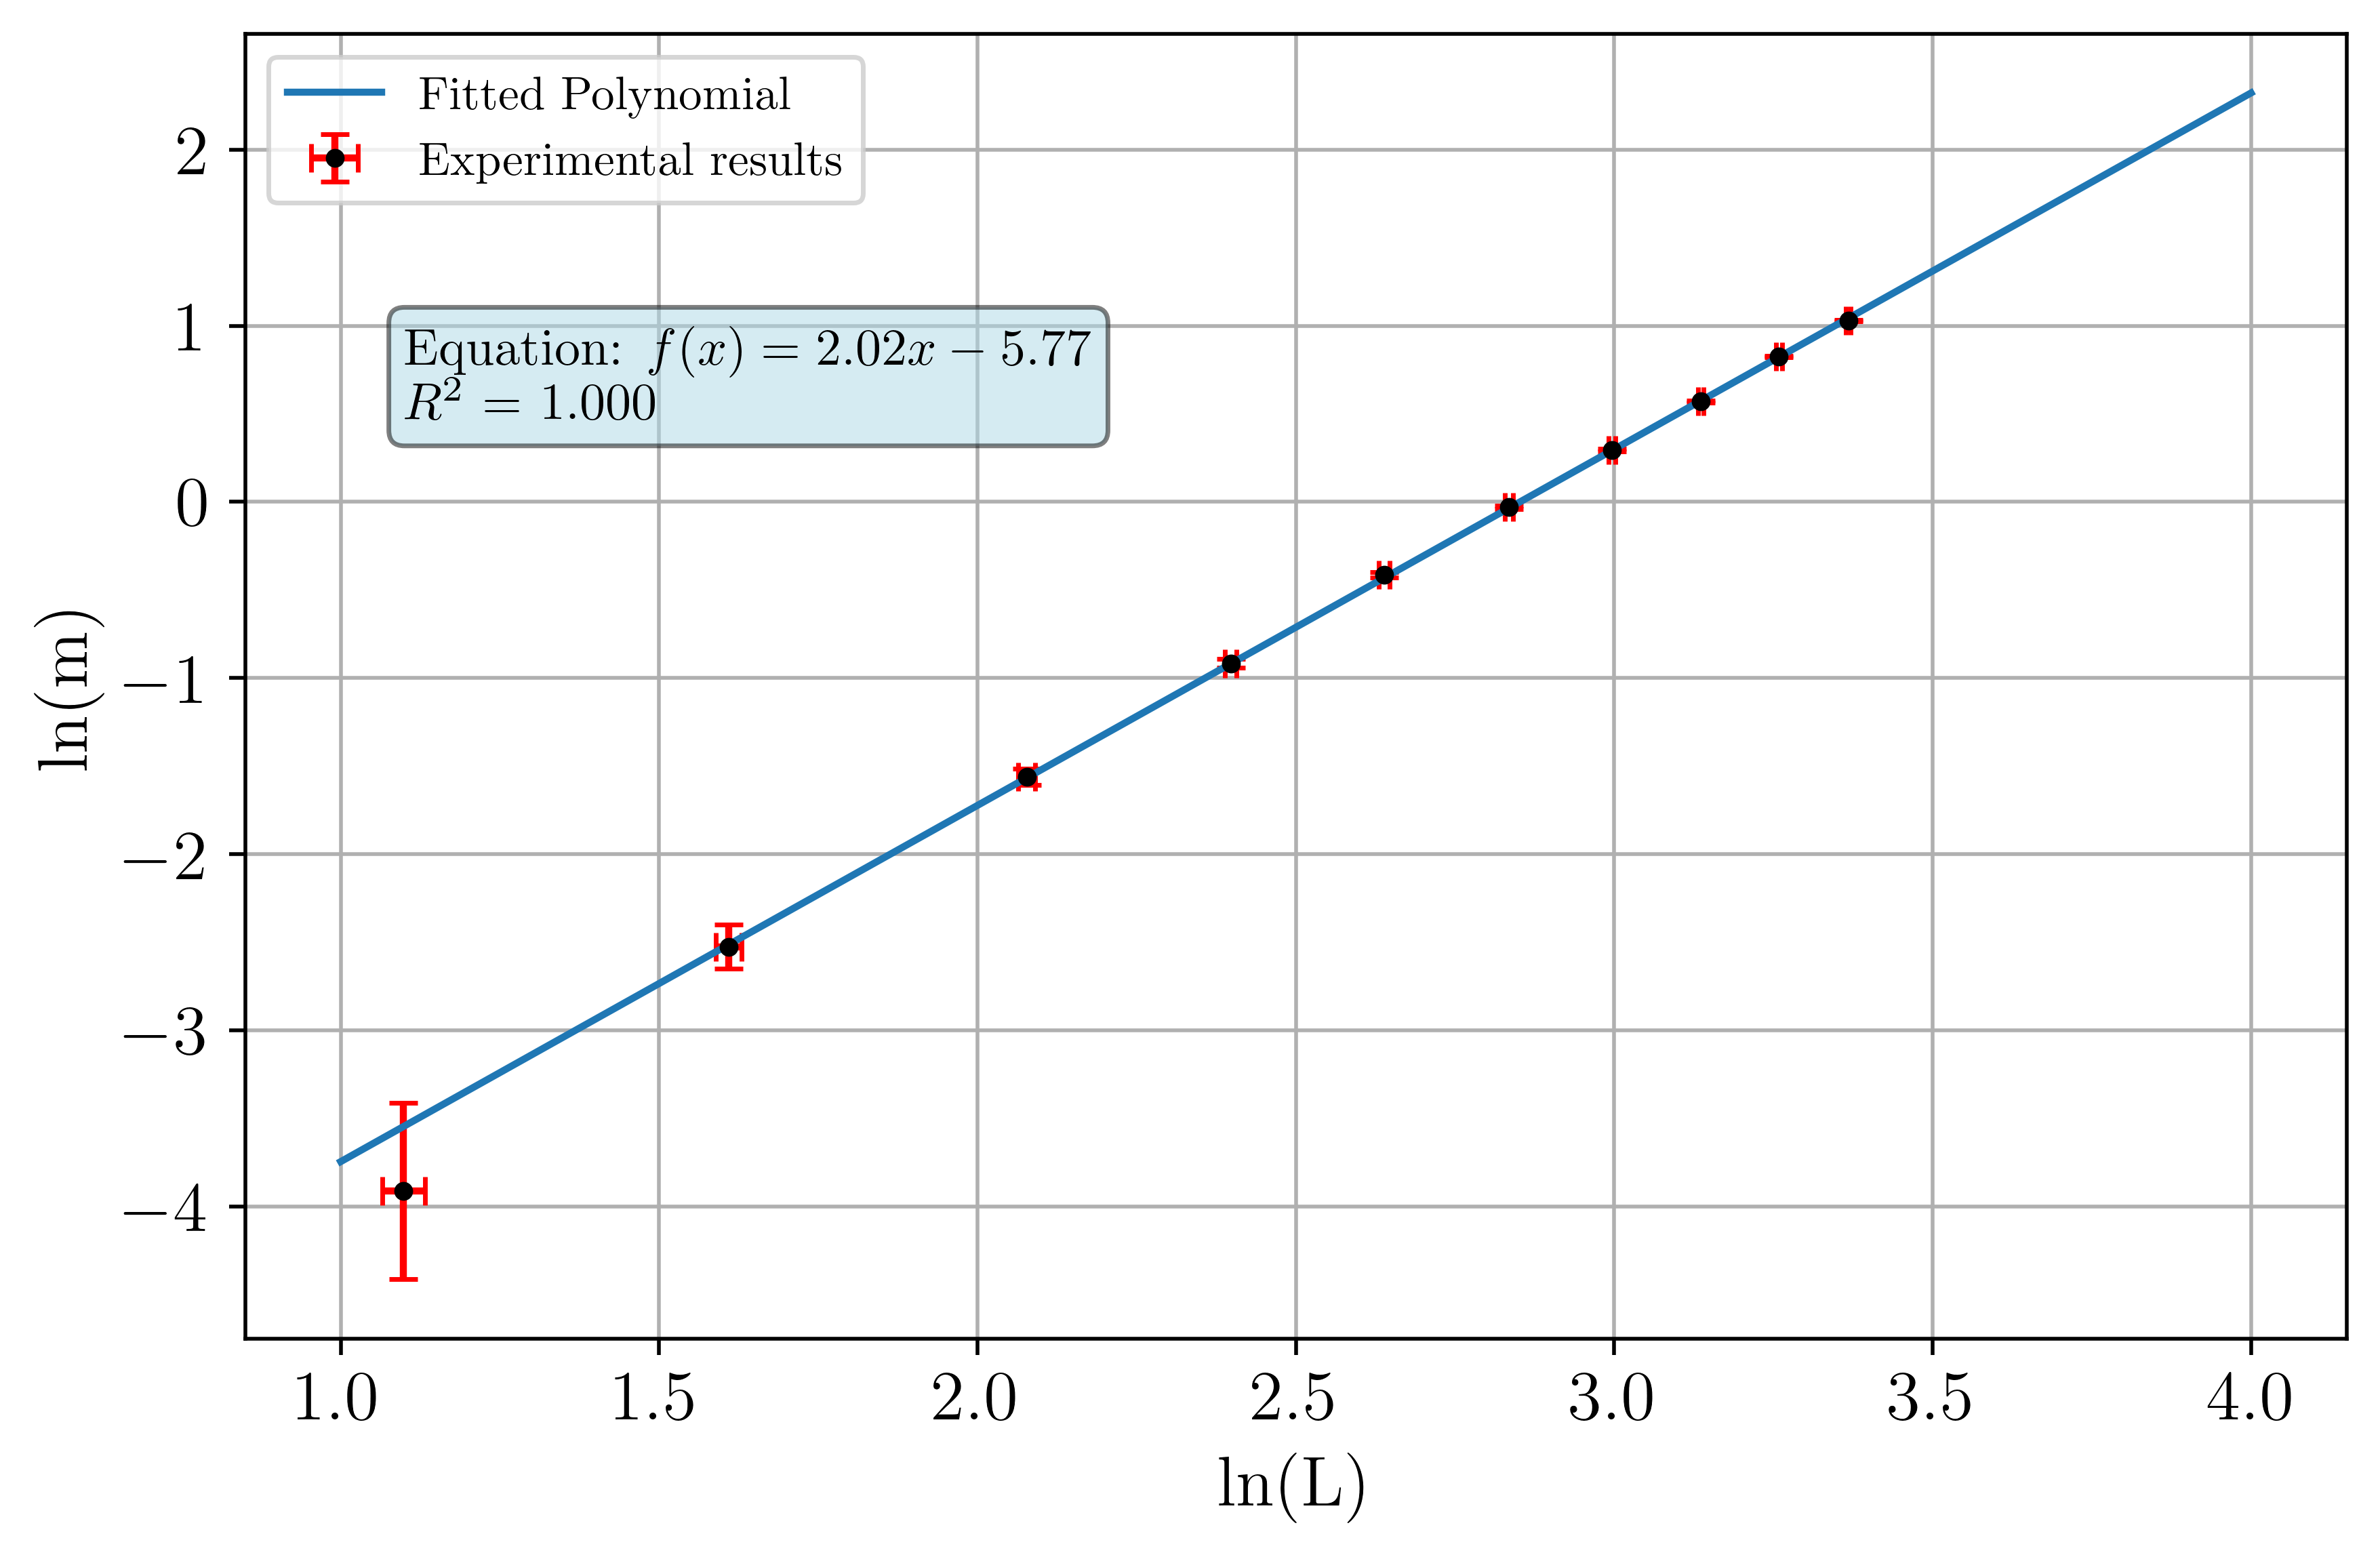

Best-fit coefficients: [ 2.02218228 -5.76722231]


In [7]:
#Power Law fit
coefficients1 = np.polyfit(np.log(lengths[:-1]), np.log(mass[:-1]), 1)
poly_func1 = np.poly1d(coefficients1)
x_fit = np.linspace(1, 4, 100)
y_fit1 = poly_func1(x_fit)

r_squared = r2_score(np.log(mass[:-1]), poly_func1(np.log(lengths[:-1])))
equation_str = f"$f(x) = {coefficients1[0]:.2f}x {coefficients1[1]:.2f}$"


fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(np.log(lengths),np.log(mass),xerr = dataexp_1['Δln(L)'],yerr= dataexp_1['Δln(m)'], color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, y_fit1, label='Fitted Polynomial')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"Equation: {equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(1.1, 1.0, textstr, fontsize=11, verticalalignment='top', bbox=props)

plt.xlabel('ln(L)')
plt.ylabel('ln(m)')
plt.grid()
plt.legend()
plt.show()

print(f"Best-fit coefficients: {coefficients1}")

# Part II: Crumpled aluminum squares

In [13]:
# Use curve_fit to find the best-fit parameters k and alpha
params2, covariance = curve_fit(power_law, diameters[1:], mass[1:])
ùparams2, covariance = curve_fit(power_law, diameters, mass)

# Extract the best-fit parameters
k, alpha = params2
print(f"Best-fit k: {k}")
print(f"Best-fit alpha: {alpha}")

#Error on the parameters
errors2 = np.sqrt(np.diag(covariance))
print(f"Error on k: {errors2[0]}")
print(f"Error on alpha: {errors2[1]}")

Best-fit k: 0.0005585560964953872
Best-fit alpha: 2.4682592542981747
Error on k: 0.001278313169173011
Error on alpha: 0.1449096753050024


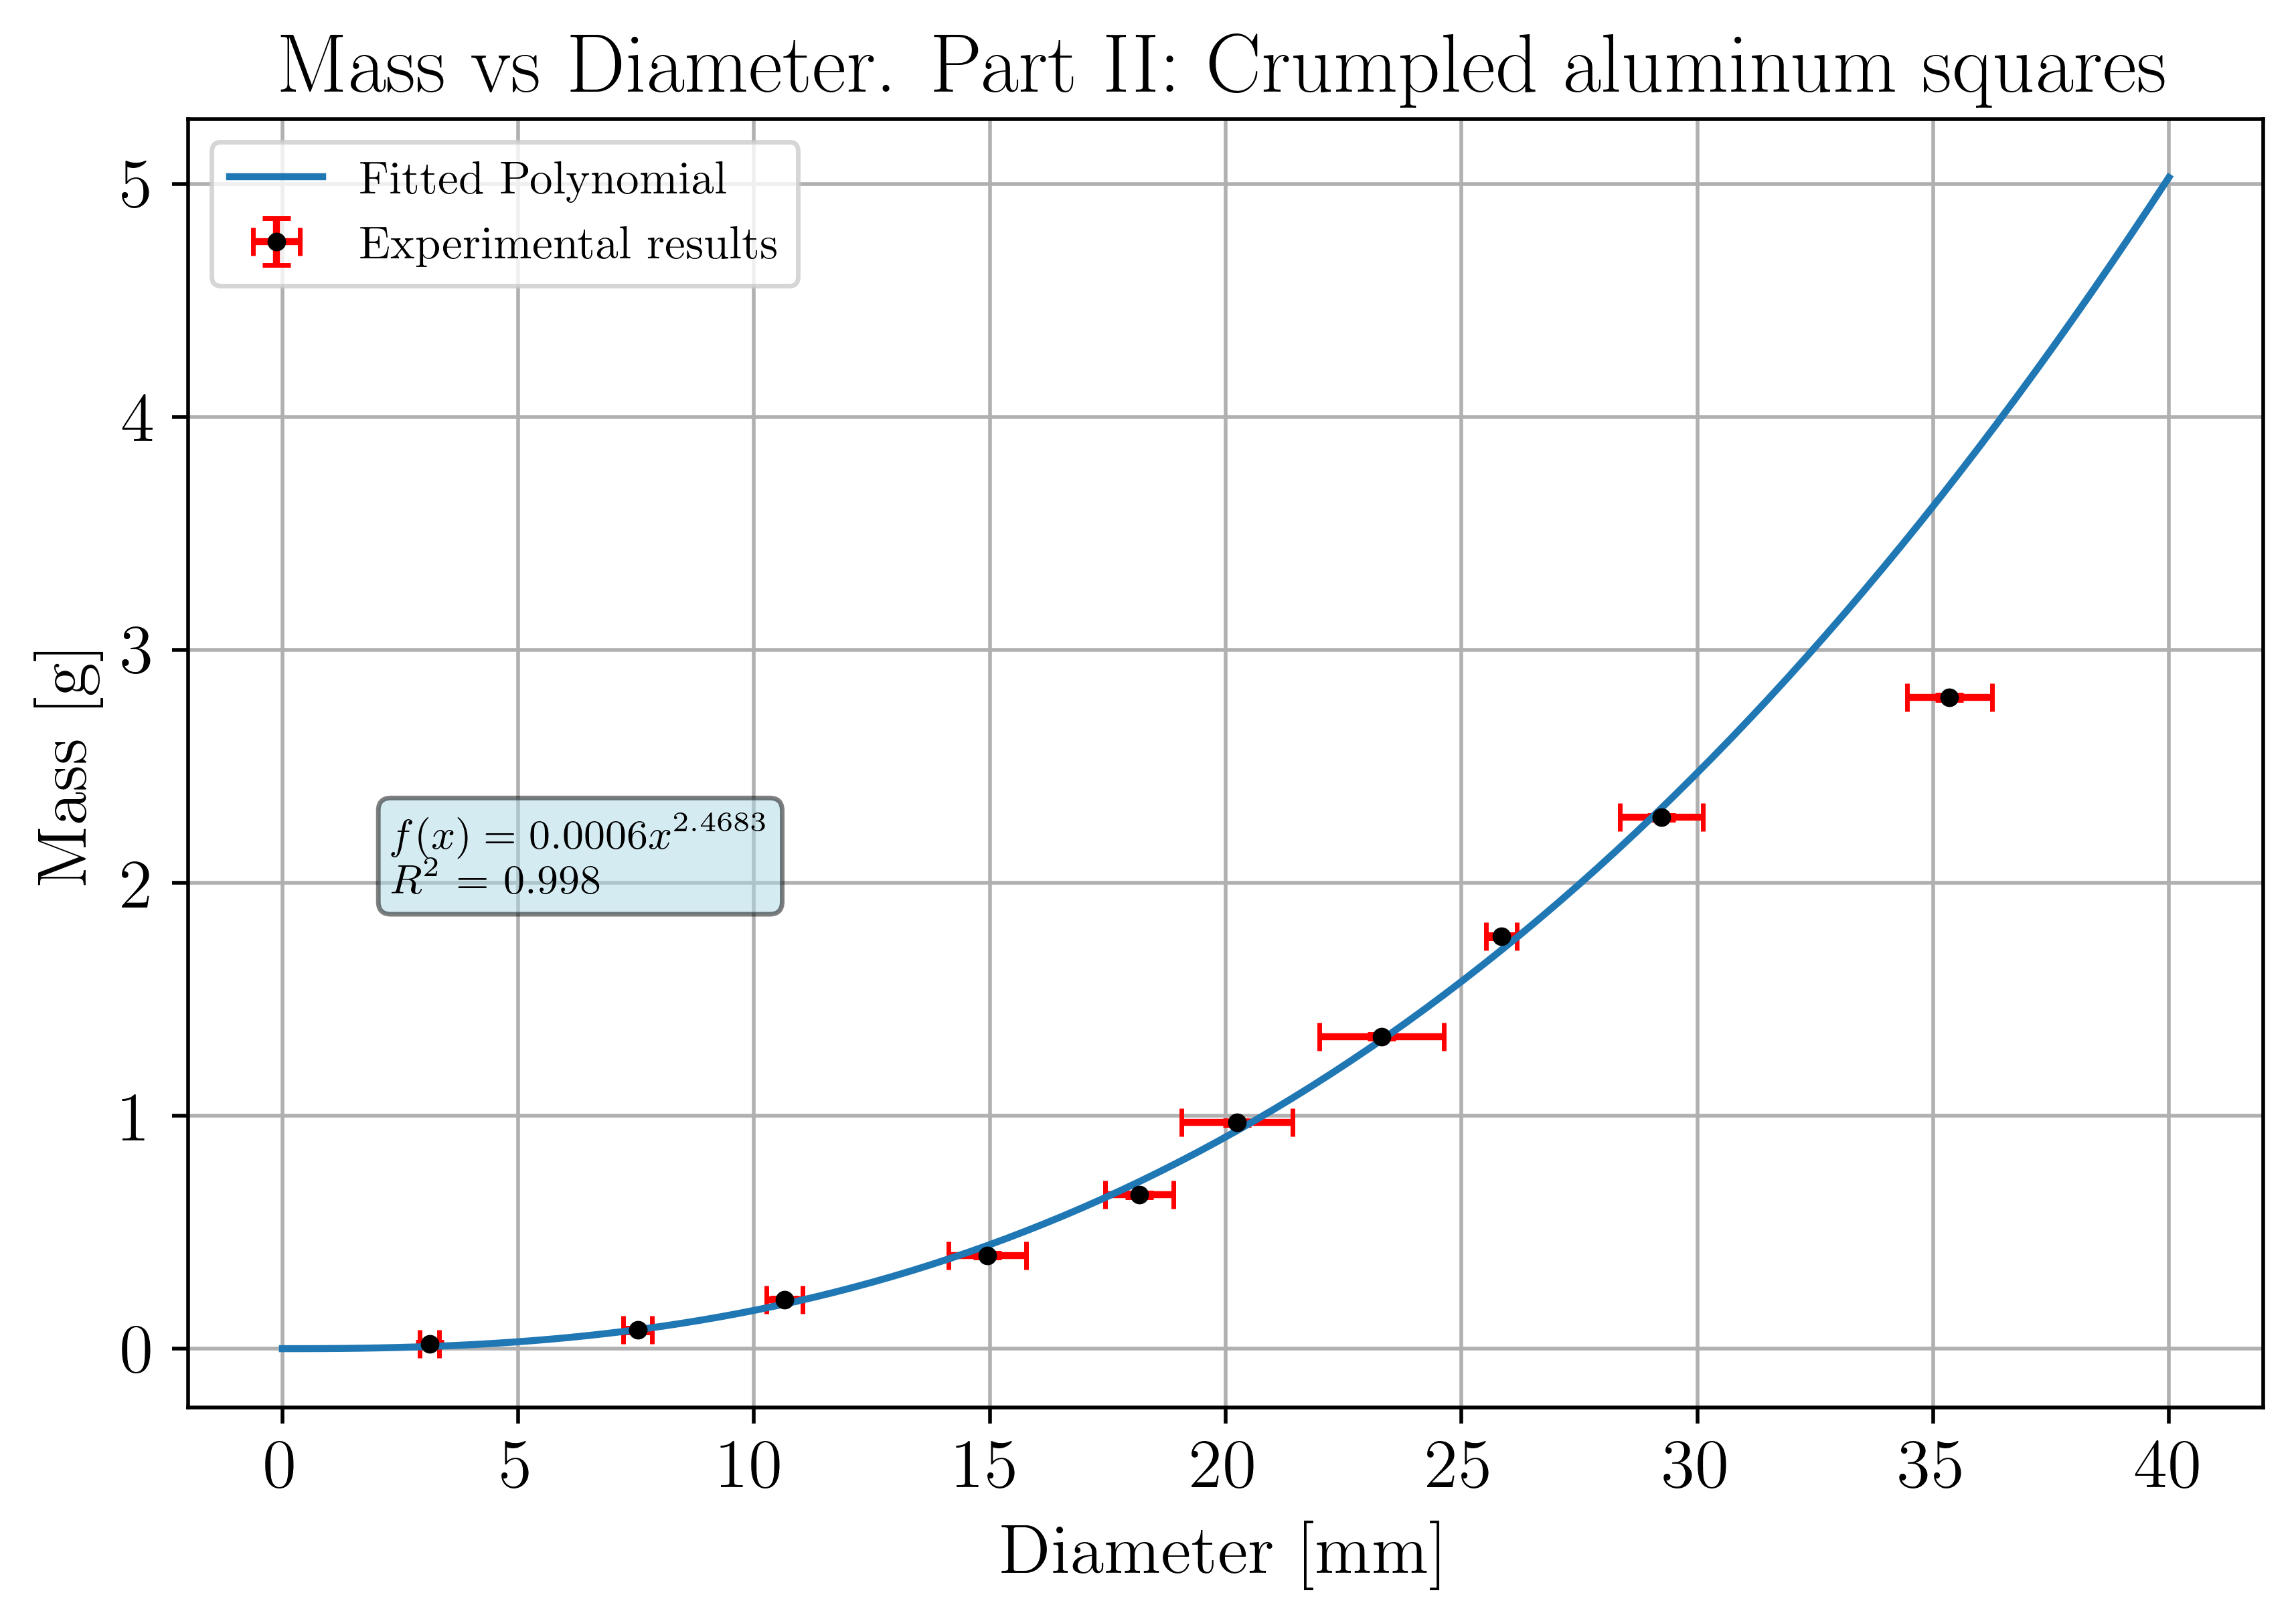

In [9]:
#Power Law fit
x_fit = np.linspace(0, 40, 100)


r_squared = r2_score(mass[1:], power_law(diameters[1:], *params2))
equation_str = f"$f(x) = {k:.4f}x^{{{alpha:.4f}}}$"

fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(diameters,mass, xerr = dataexp_2['Error Diameter'], yerr = dataexp_1['Error Mass'],color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, power_law(x_fit, *params2), label='Fitted Polynomial')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"{equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(2.3, 2.3, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('Diameter [mm]')
plt.ylabel('Mass [g]')
plt.title('Mass vs Diameter. Part II: Crumpled aluminum squares')
plt.grid()
plt.legend()

plt.show()

# Linearization II

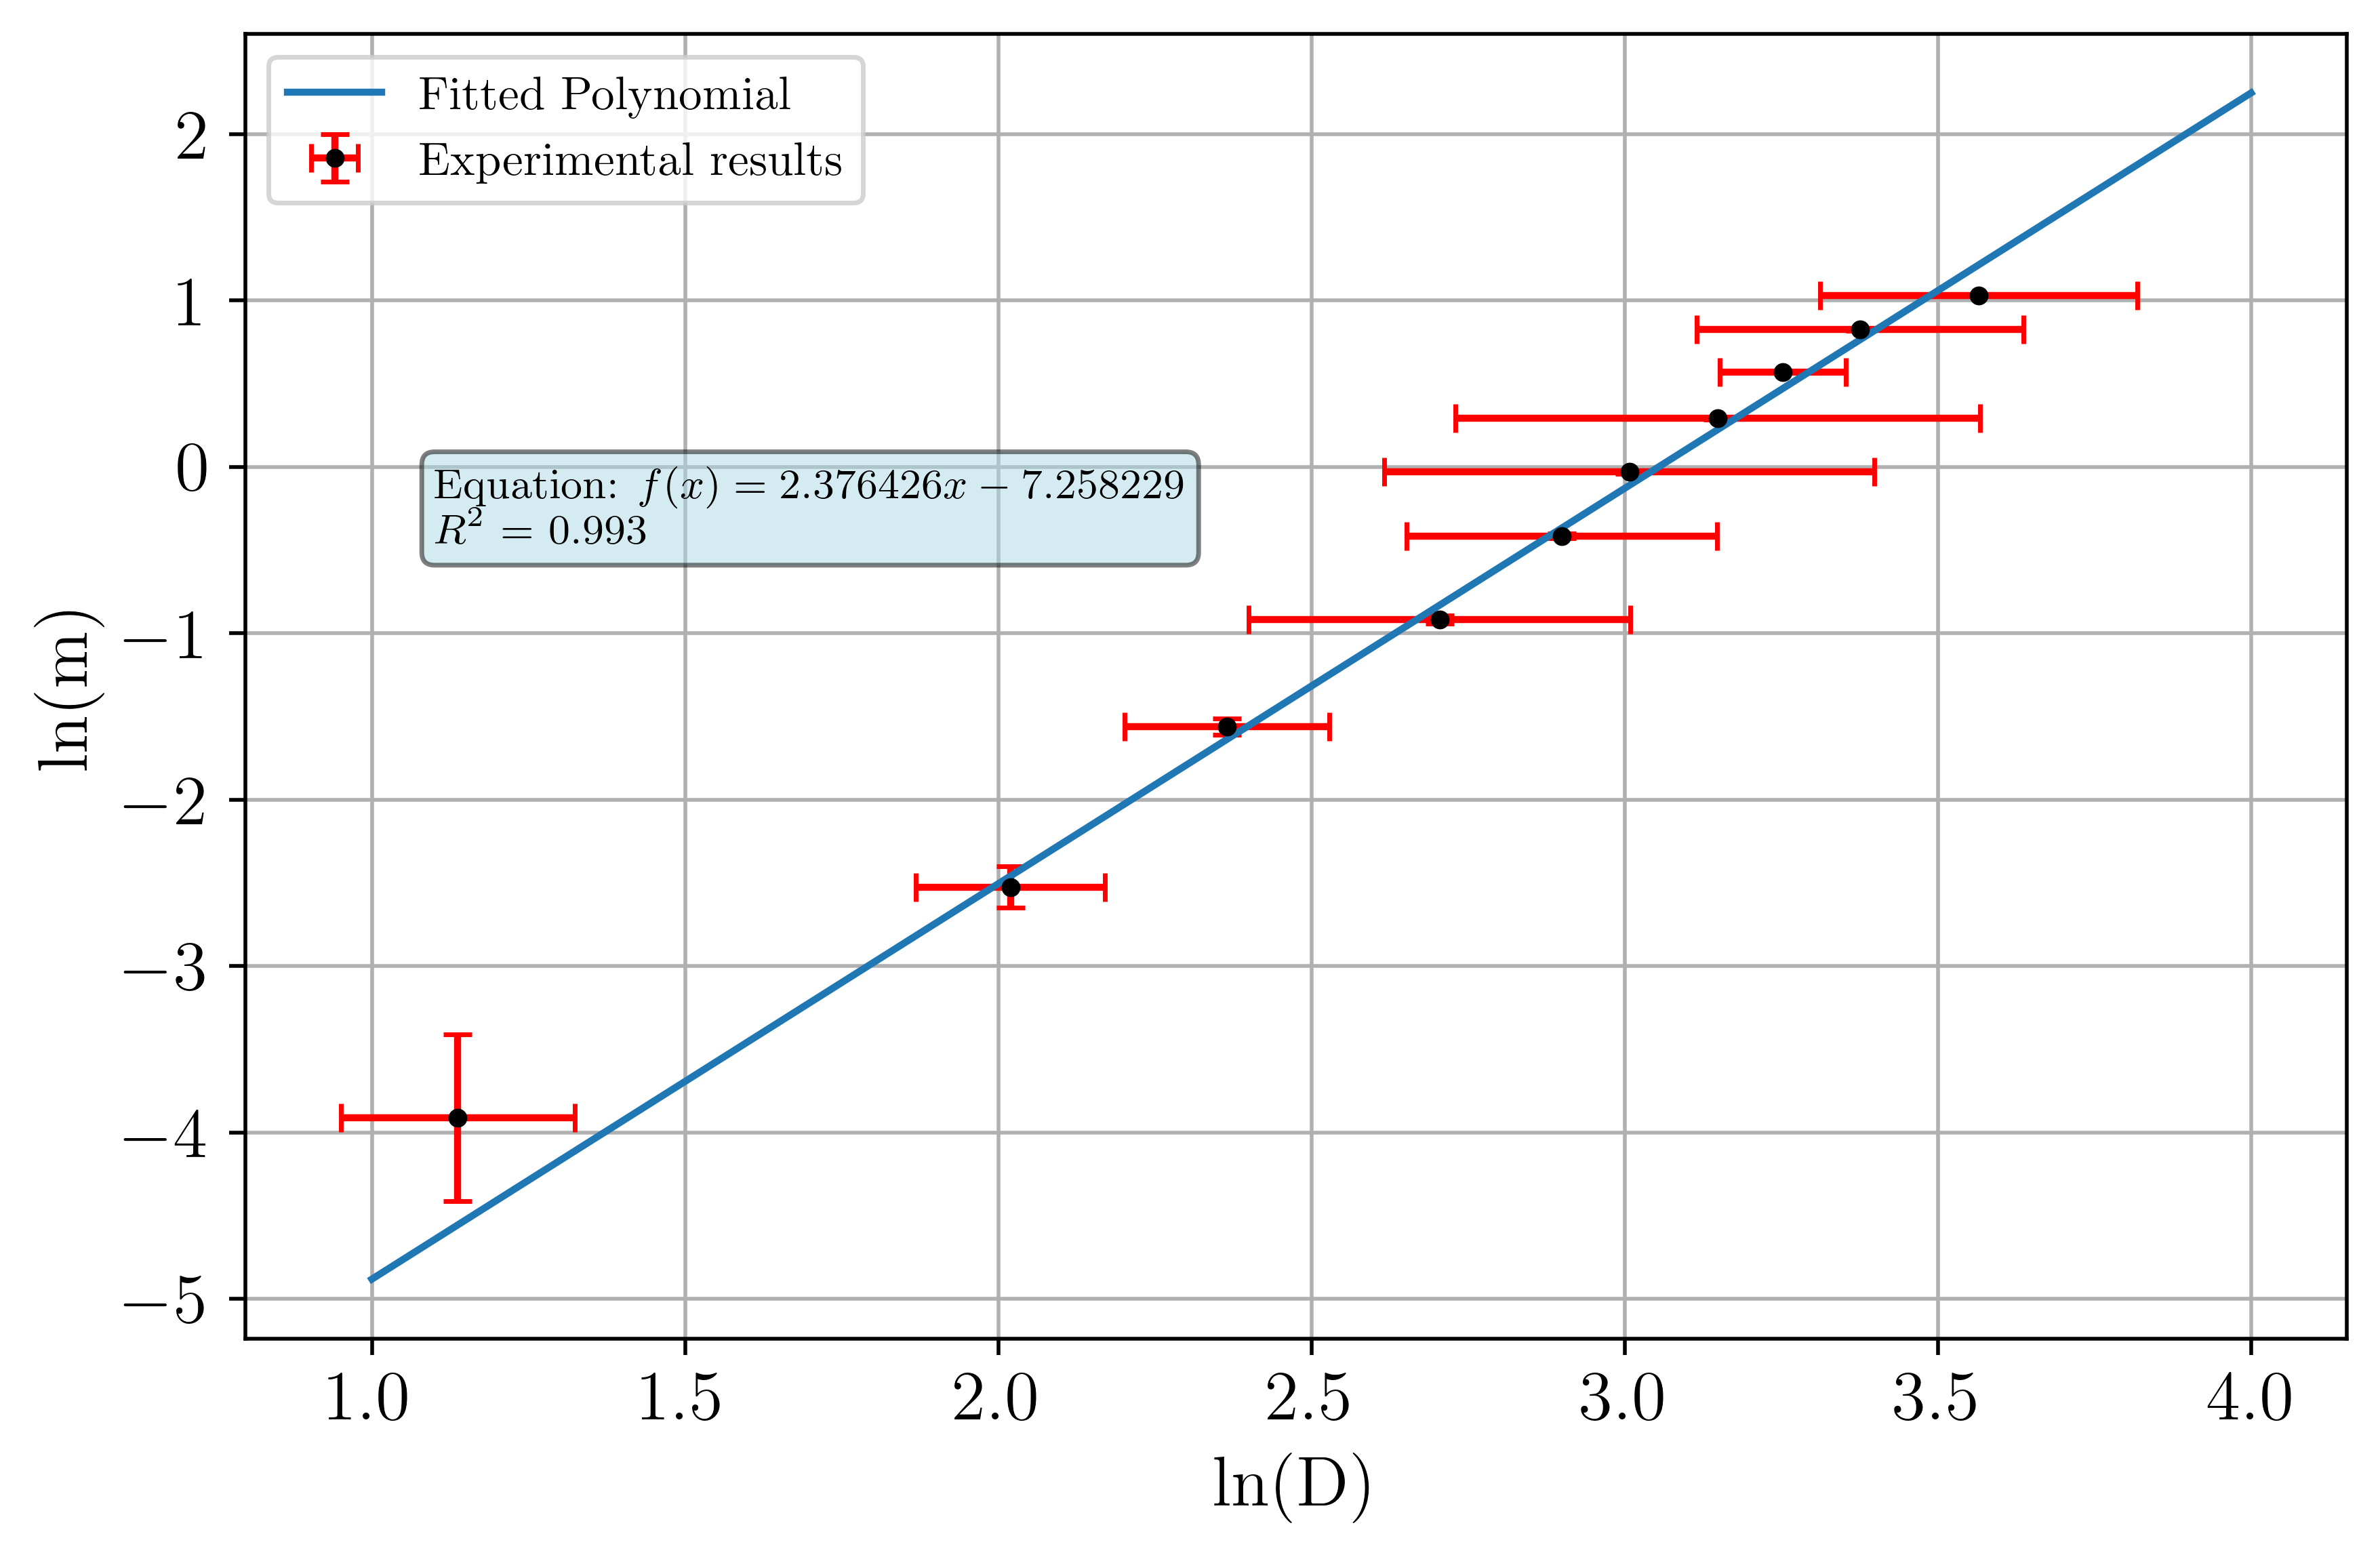

[ 2.37642615 -7.25822868]


In [10]:
#Power Law fit
coefficients2 = np.polyfit(np.log(diameters[:-1]), np.log(mass[:-1]), 1)
poly_func2 = np.poly1d(coefficients2)
x_fit = np.linspace(1, 4, 100)
y_fit2 = poly_func2(x_fit)

r_squared = r2_score(np.log(mass[:-1]), poly_func2(np.log(diameters[:-1])))
equation_str = f"$f(x) = {coefficients2[0]:.6f}x {coefficients2[1]:.6f}$"


fig, ax = plt.subplots(figsize=(8, 5), dpi = 500)

ax.errorbar(np.log(diameters),np.log(mass),xerr = dataexp_2['Δln(D)'],yerr= dataexp_1['Δln(m)'], color = 'black', ecolor = "red",capsize = 3, fmt = '.',  label = 'Experimental results')
ax.plot(x_fit, y_fit2, label='Fitted Polynomial')

# Enclose the text in a box
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
textstr = f"Equation: {equation_str}\n$R^2$ = {r_squared:.3f}"
plt.text(1.1, 0.0, textstr, fontsize=9, verticalalignment='top', bbox=props)

plt.xlabel('ln(D)')
plt.ylabel('ln(m)')
plt.grid()
plt.legend()
plt.show()

print(coefficients2)

# Extra Graphs

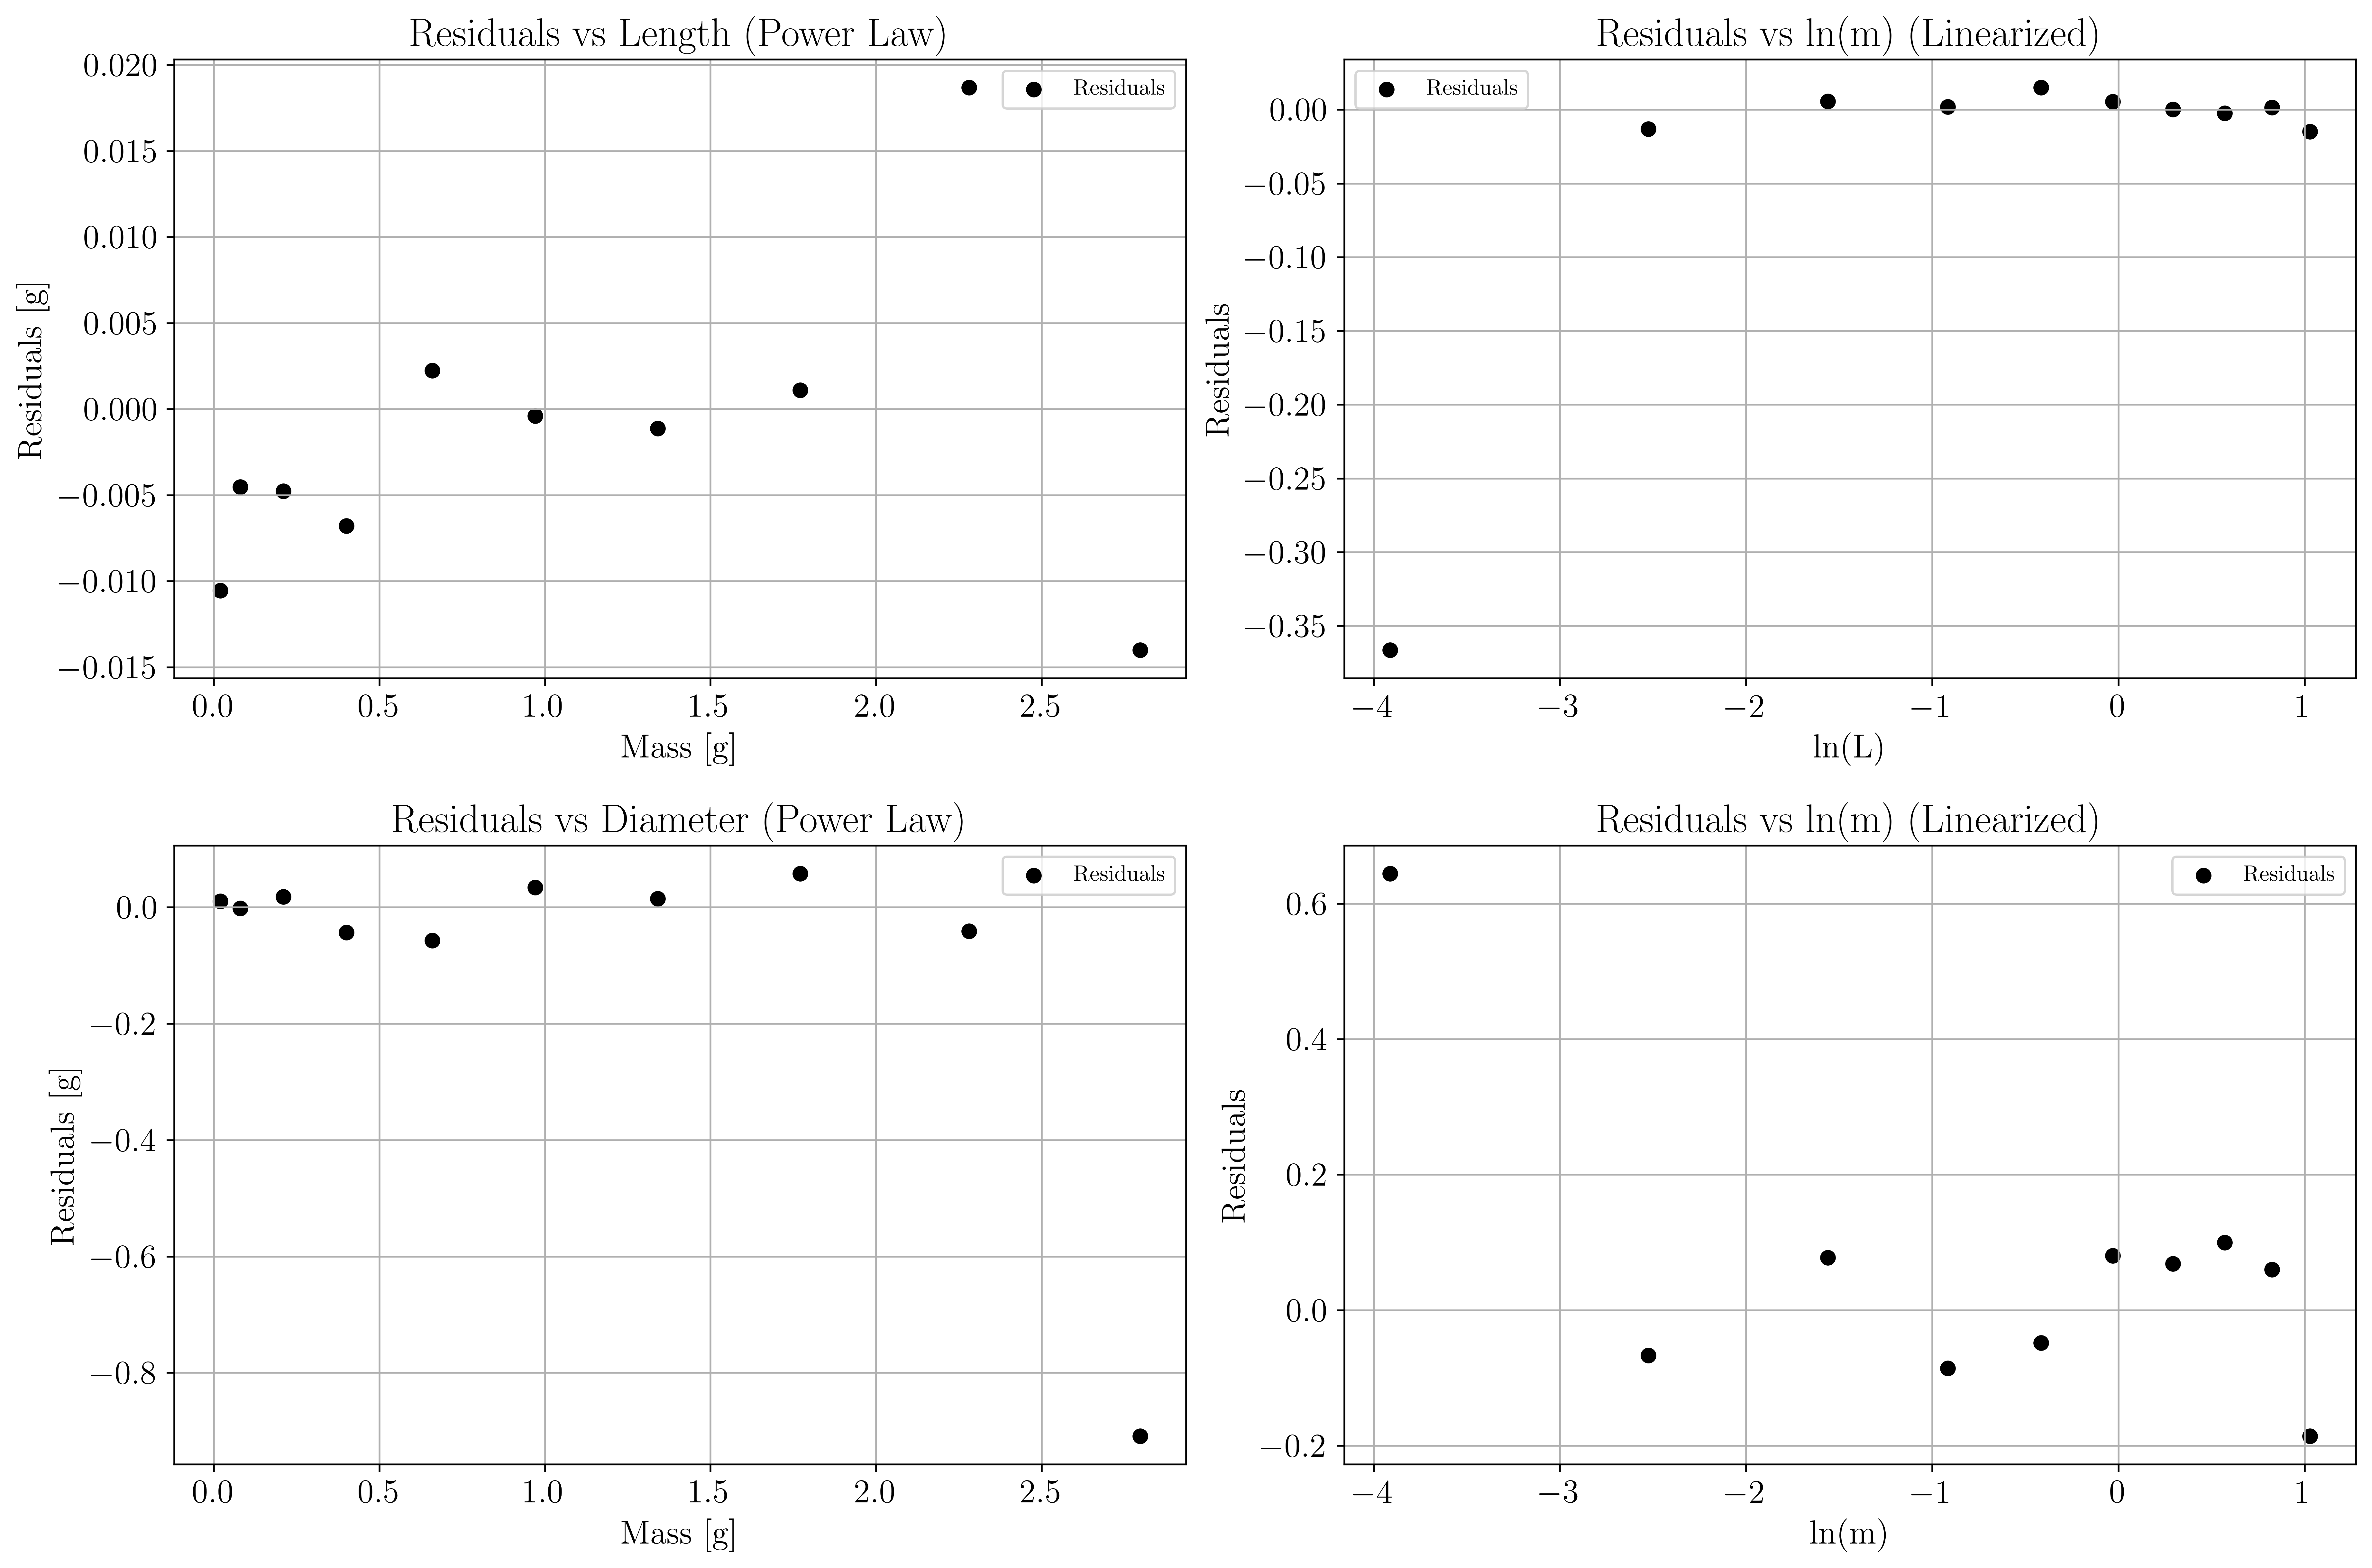

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=500)

# Residuals for Part I: Aluminum foil squares (Power Law)
axs[0, 0].scatter(mass, mass - power_law(lengths, *params1), color='black', label='Residuals')
axs[0, 0].set_xlabel('Mass [g]')
axs[0, 0].set_ylabel('Residuals [g]')
axs[0, 0].set_title('Residuals vs Length (Power Law)')
axs[0, 0].grid()
axs[0, 0].legend()

# Residuals for Part I: Aluminum foil squares (Linearized)
axs[0, 1].scatter(np.log(mass), np.log(mass) - poly_func1(np.log(lengths)), color='black', label='Residuals')
axs[0, 1].set_xlabel('ln(L)')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].set_title('Residuals vs ln(m) (Linearized)')
axs[0, 1].grid()
axs[0, 1].legend()

# Residuals for Part II: Crumpled aluminum squares (Power Law)
axs[1, 0].scatter(mass, mass - power_law(diameters, *params2), color='black', label='Residuals')
axs[1, 0].set_xlabel('Mass [g]')
axs[1, 0].set_ylabel('Residuals [g]')
axs[1, 0].set_title('Residuals vs Diameter (Power Law)')
axs[1, 0].grid()
axs[1, 0].legend()

# Residuals for Part II: Crumpled aluminum squares (Linearized)
axs[1, 1].scatter(np.log(mass), np.log(mass) - poly_func2(np.log(diameters)), color='black', label='Residuals')
axs[1, 1].set_xlabel('ln(m)')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].set_title('Residuals vs ln(m) (Linearized)')
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()





